In [27]:
import pandas as pd
data_2023_2024=pd.read_html("https://fbref.com/es/comps/9/horario/Resultados-y-partidos-en-Premier-League", encoding = 'UTF-8')
data = pd.read_htmldata_2022_2023=pd.read_html("https://fbref.com/es/comps/9/2022-2023/horario/Marcadores-y-partidos-de-2022-2023-Premier-League", encoding = 'UTF-8')

data = data[0]
data_2023_2024 = data_2023_2024[0]

#unir dataframes
df = [data,data_2023_2024]
df = pd.concat(df)

#agregar columnas de goles locales y goles visita
df[['Goles Local','Goles Visita']] = df['Marcador'].str.split('–', expand=True)
#Eliminar la columna de Marcador
data = df.drop('Marcador', axis=1)


import re
def extraer_numero(cadena):
    numeros = re.findall(r'\b\d+\b', str(cadena))
    if numeros:
        return int(numeros[0])
    else:
        return None
    
data['Goles Local'] = data['Goles Local'].apply(extraer_numero).fillna(0).astype(int)
data['Goles Visita'] = data['Goles Visita'].apply(extraer_numero).fillna(0).astype(int)
indices_a_eliminar = [indice for indice, valor in data['Día'].iteritems() if pd.isna(valor)]
data = data.drop(indices_a_eliminar)
data = data.reset_index(drop=True)

data

,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visita
0,1.0,Vie,2022-08-05,20:00,Crystal Palace,1.2,1.0,Arsenal,25286.0,Selhurst Park,Anthony Taylor,Informe del partido,NaN,0,2
1,1.0,Sáb,2022-08-06,12:30,Fulham,1.2,1.2,Liverpool,22207.0,Craven Cottage,Andy Madley,Informe del partido,NaN,2,2
2,1.0,Sáb,2022-08-06,15:00,Tottenham,1.5,0.5,Southampton,61732.0,Tottenham Hotspur Stadium,Andre Marriner,Informe del partido,NaN,4,1
3,1.0,Sáb,2022-08-06,15:00,Newcastle Utd,1.7,0.3,Nott'ham Forest,52245.0,St James' Park,Simon Hooper,Informe del partido,NaN,2,0
4,1.0,Sáb,2022-08-06,15:00,Leeds United,0.8,1.3,Wolves,36347.0,Elland Road,Robert Jones,Informe del partido,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,38.0,Dom,2024-05-19,NaN,Arsenal,NaN,NaN,Everton,NaN,Emirates Stadium,NaN,Cara a cara,NaN,0,0
668,38.0,Dom,2024-05-19,NaN,Brighton,NaN,NaN,Manchester Utd,NaN,The American Express Community Stadium,NaN,Cara a cara,NaN,0,0
669,38.0,Dom,2024-05-19,NaN,Brentford,NaN,NaN,Newcastle Utd,NaN,Gtech Community Stadium,NaN,Cara a cara,NaN,0,0
670,38.0,Dom,2024-05-19,NaN,Crystal Palace,NaN,NaN,Aston Villa,NaN,Selhurst Park,NaN,Cara a cara,NaN,0,0


In [28]:
data.head(20)

,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visita
0,1.0,Vie,2022-08-05,20:00,Crystal Palace,1.2,1.0,Arsenal,25286.0,Selhurst Park,Anthony Taylor,Informe del partido,NaN,0,2
1,1.0,Sáb,2022-08-06,12:30,Fulham,1.2,1.2,Liverpool,22207.0,Craven Cottage,Andy Madley,Informe del partido,NaN,2,2
2,1.0,Sáb,2022-08-06,15:00,Tottenham,1.5,0.5,Southampton,61732.0,Tottenham Hotspur Stadium,Andre Marriner,Informe del partido,NaN,4,1
3,1.0,Sáb,2022-08-06,15:00,Newcastle Utd,1.7,0.3,Nott'ham Forest,52245.0,St James' Park,Simon Hooper,Informe del partido,NaN,2,0
4,1.0,Sáb,2022-08-06,15:00,Leeds United,0.8,1.3,Wolves,36347.0,Elland Road,Robert Jones,Informe del partido,NaN,2,1
5,1.0,Sáb,2022-08-06,15:00,Bournemouth,0.6,0.7,Aston Villa,11013.0,Vitality Stadium,Peter Bankes,Informe del partido,NaN,2,0
6,1.0,Sáb,2022-08-06,17:30,Everton,0.7,1.5,Chelsea,39254.0,Goodison Park,Craig Pawson,Informe del partido,NaN,0,1
7,1.0,Dom,2022-08-07,14:00,Leicester City,0.6,0.8,Brentford,31794.0,King Power Stadium,Jarred Gillett,Informe del partido,NaN,2,2
8,1.0,Dom,2022-08-07,14:00,Manchester Utd,1.4,1.5,Brighton,73711.0,Old Trafford,Paul Tierney,Informe del partido,NaN,1,2
9,1.0,Dom,2022-08-07,16:30,West Ham,0.5,2.2,Manchester City,62443.0,London Stadium,Michael Oliver,Informe del partido,NaN,0,2


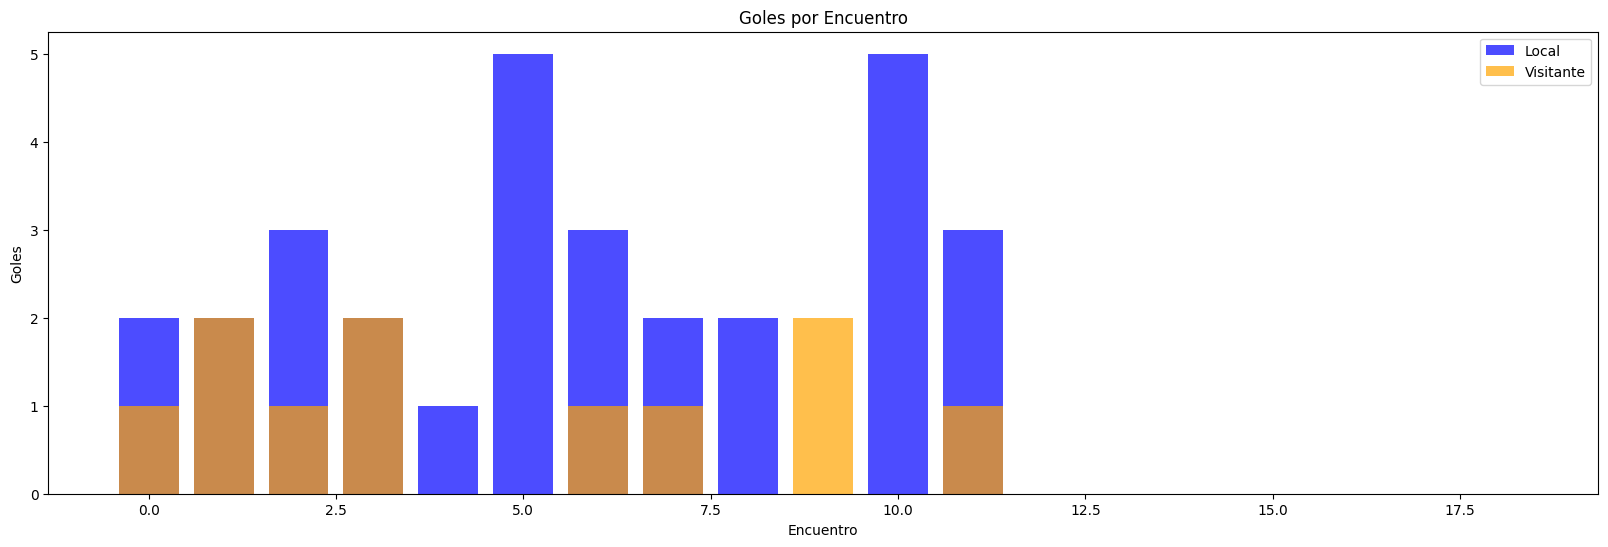

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
'''
El codigo lo que hace en si es graficar los encuentros de cada equipo local contra visitante ahora podemos acotar 
a una serie para poder ver mejor los datos 
'''



# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(20, 6))

# Barra para los goles del equipo local
ax.bar(data_arsenal.index, data_arsenal['Goles Local'], label='Local', color='blue', alpha=0.7)

# Barra para los goles del equipo visitante
ax.bar(data_arsenal.index, data_arsenal['Goles Visitante'], label='Visitante', color='orange', alpha=0.7)

# Configurar etiquetas y título
ax.set_xlabel('Encuentro')
ax.set_ylabel('Goles')
ax.set_title('Goles por Encuentro')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [31]:
def grafica_local_visita(data,ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 6))
    
    # Barra para los goles del equipo local
    ax.bar(data.index, data['Goles Local'], label='Local', color='blue', alpha=0.7)
    
    # Barra para los goles del equipo visitante
    ax.bar(data.index, data['Goles Visita'], label='Visita', color='orange', alpha=0.7)
    
    # Configurar etiquetas y título
    ax.set_xlabel('Encuentro')
    ax.set_ylabel('Goles')
    ax.set_title('Goles por Encuentro')
    
    # Mostrar la leyenda
    ax.legend()
    
    # Mostrar el gráfico
    plt.show()

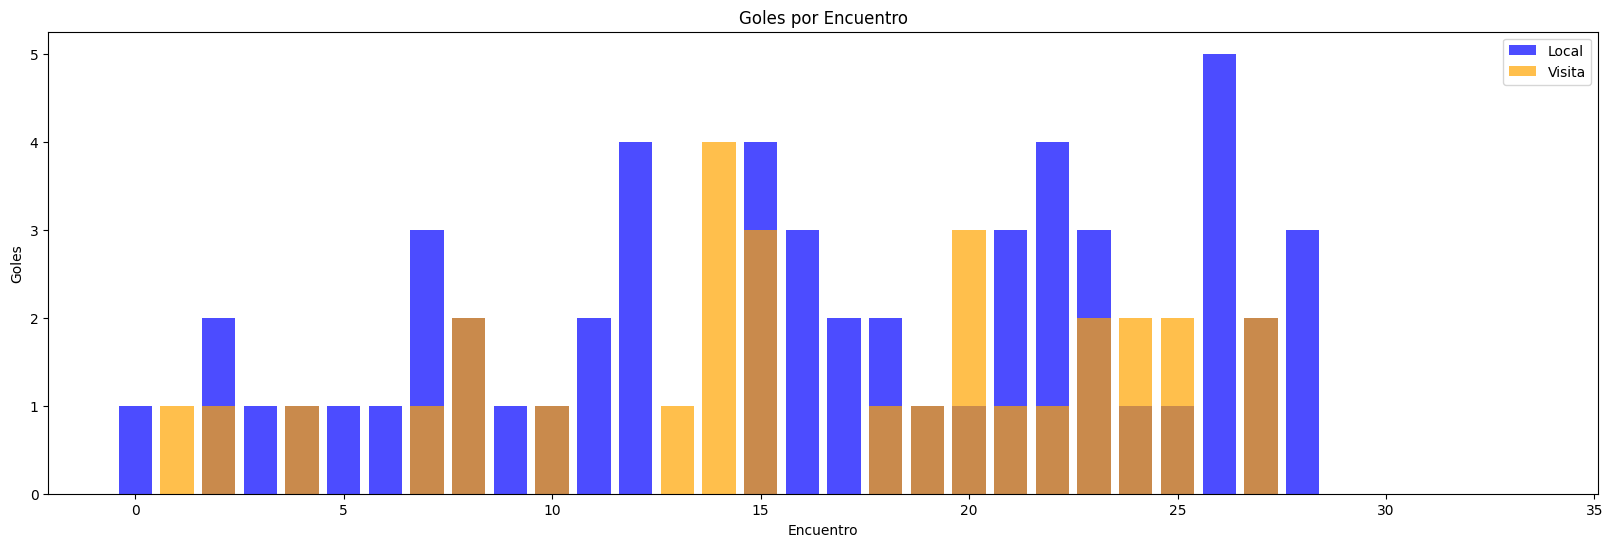

In [32]:
grafica_local_visita(data[data['Visitante']=='West Ham'].reset_index())

In [153]:
def grafica_total_goles(data,ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(20,4))
    # Calcular los goles totales por partido
    data['Goles Totales'] = data['Goles Local'] + data['Goles Visitante']

    
    # Crear un gráfico de barras con los goles totales por encuentro
    ax.bar(data.index, data['Goles Totales'], color='purple', alpha=0.7)
    
    # Configurar etiquetas y título
    ax.set_xlabel('Encuentro')
    ax.set_ylabel('Goles Totales por Encuentro')
    ax.set_title('Goles Totales por Encuentro de la Liga')
    
    
    ax.legend
    # Mostrar el gráfico
    plt.show()


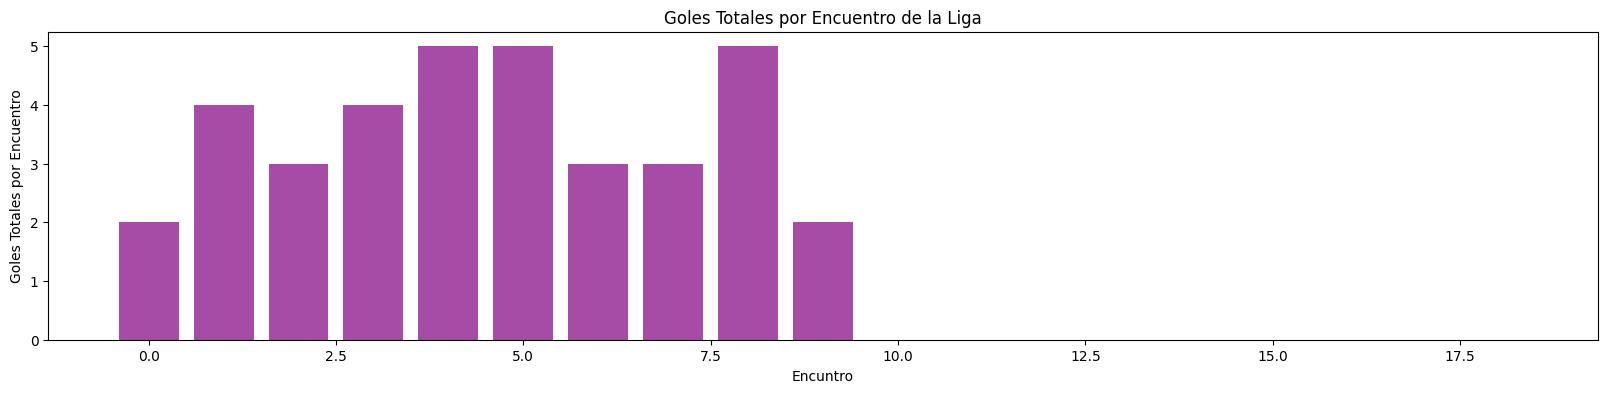

In [113]:
grafica_total_goles(data2[data2['Visitante']=='West Ham'].reset_index())

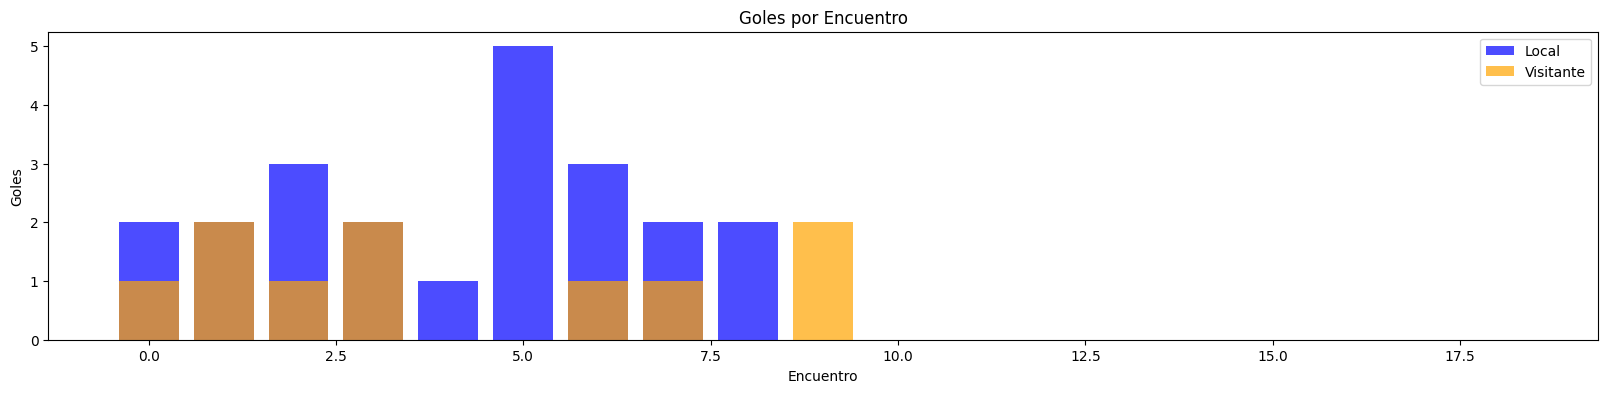

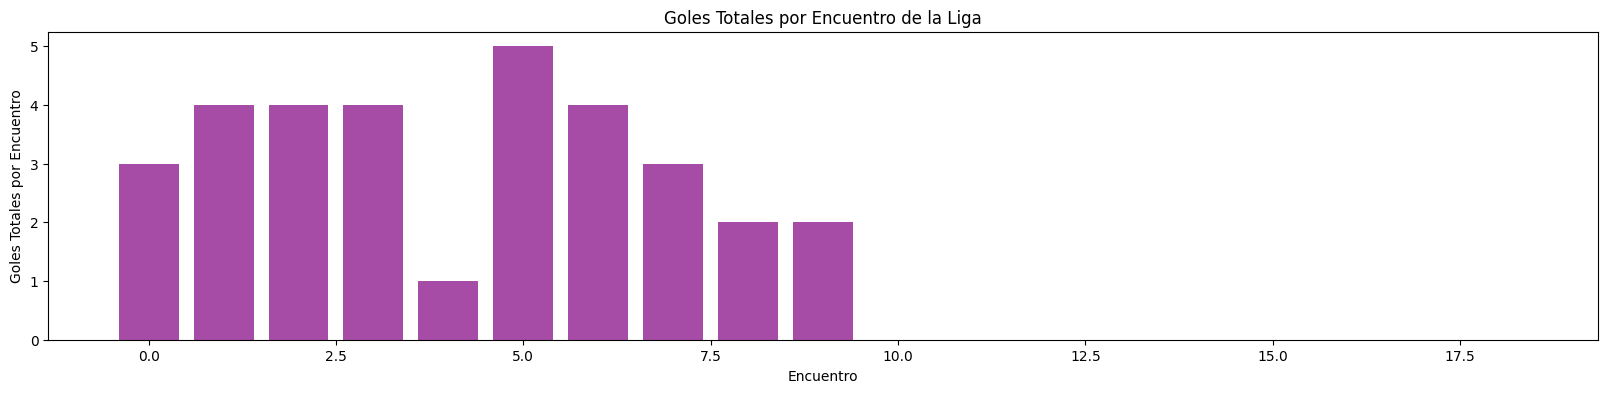

In [154]:

# Llamar a las funciones y pasar el eje de la primera gráfica como argumento a la segunda
fig, ax1 = plt.subplots(figsize=(20, 4))
grafica_local_visita(data_arsenal,ax=ax1)
grafica_total_goles(data_arsenal)

# Mostrar las gráficas
plt.show()


In [141]:
def data_para_graficar(equipo,estado):
    #Es el equipo local
    if estado in 'Visitante':
        sub_dataframe_Visitante = data2[data2['Visitante']==equipo].reset_index()
        return sub_dataframe_Visitante
    #Es el quipo visitante
    if estado in 'Local':
        sub_dataframe_local = data2[data2['Local']==equipo].reset_index()
        return sub_dataframe_local
    

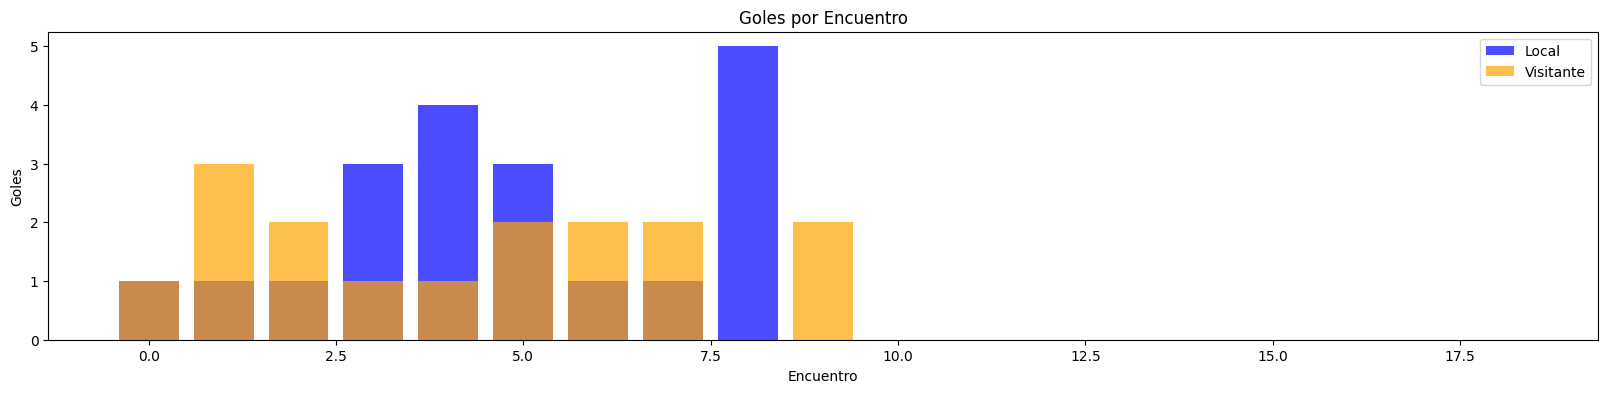

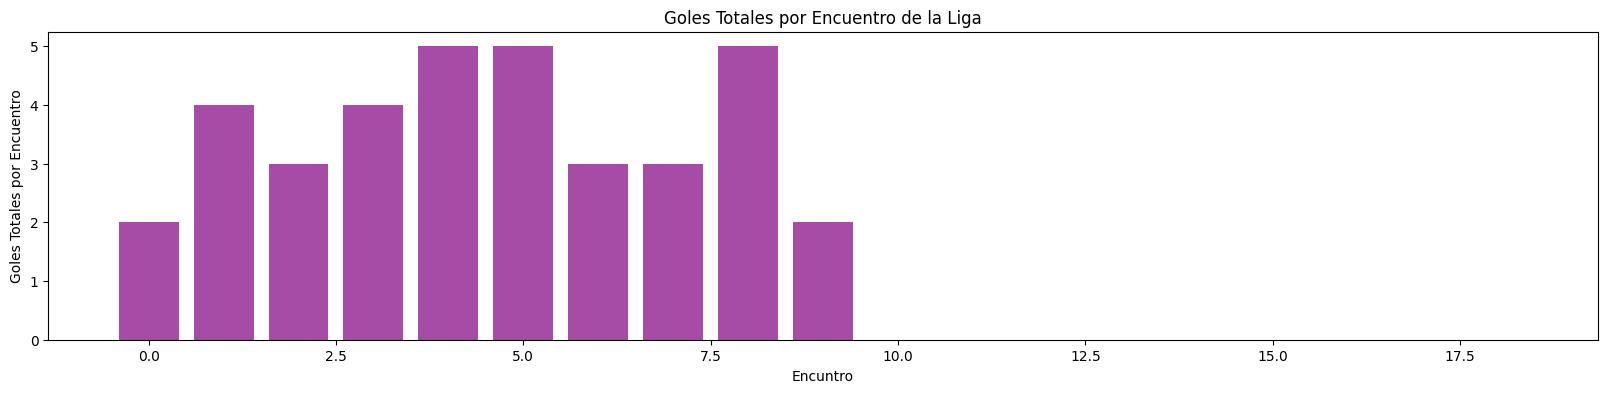

In [144]:
fig, ax1 = plt.subplots(figsize=(20, 4))
grafica_local_visita(data_para_graficar('West Ham','Visitante'), ax=ax1)
grafica_total_goles(data_para_graficar('West Ham','Visitante'))

# Mostrar las gráficas
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


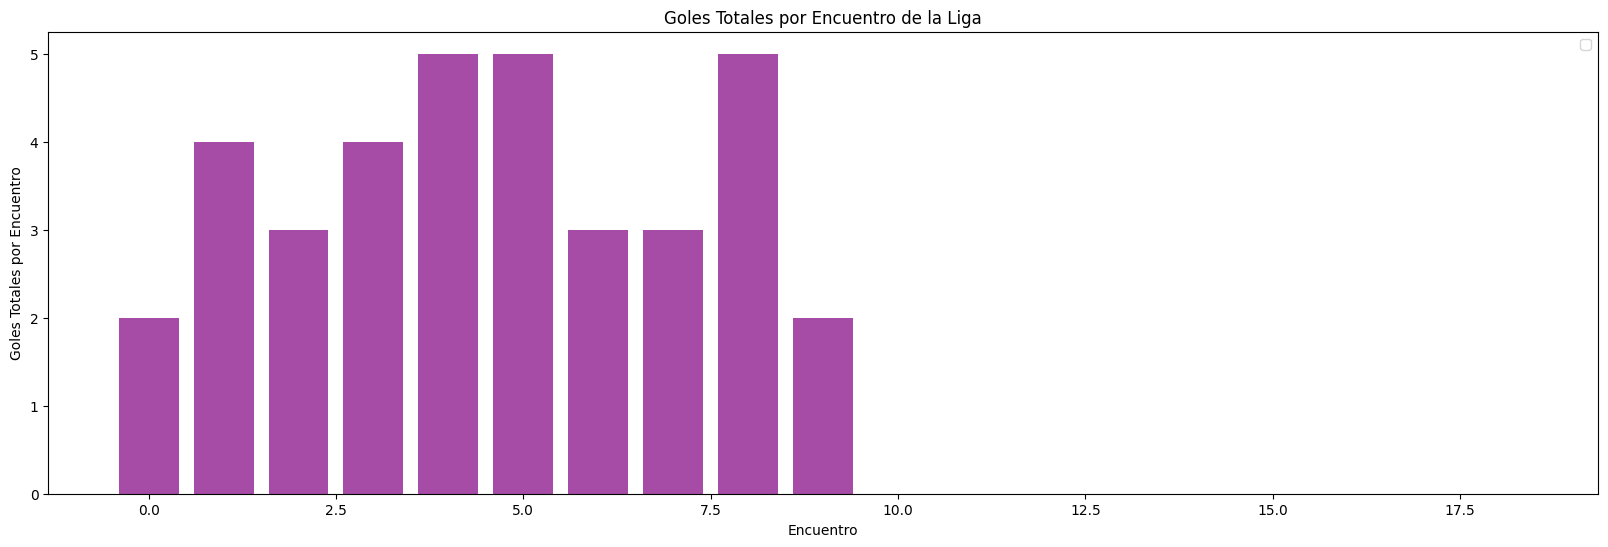

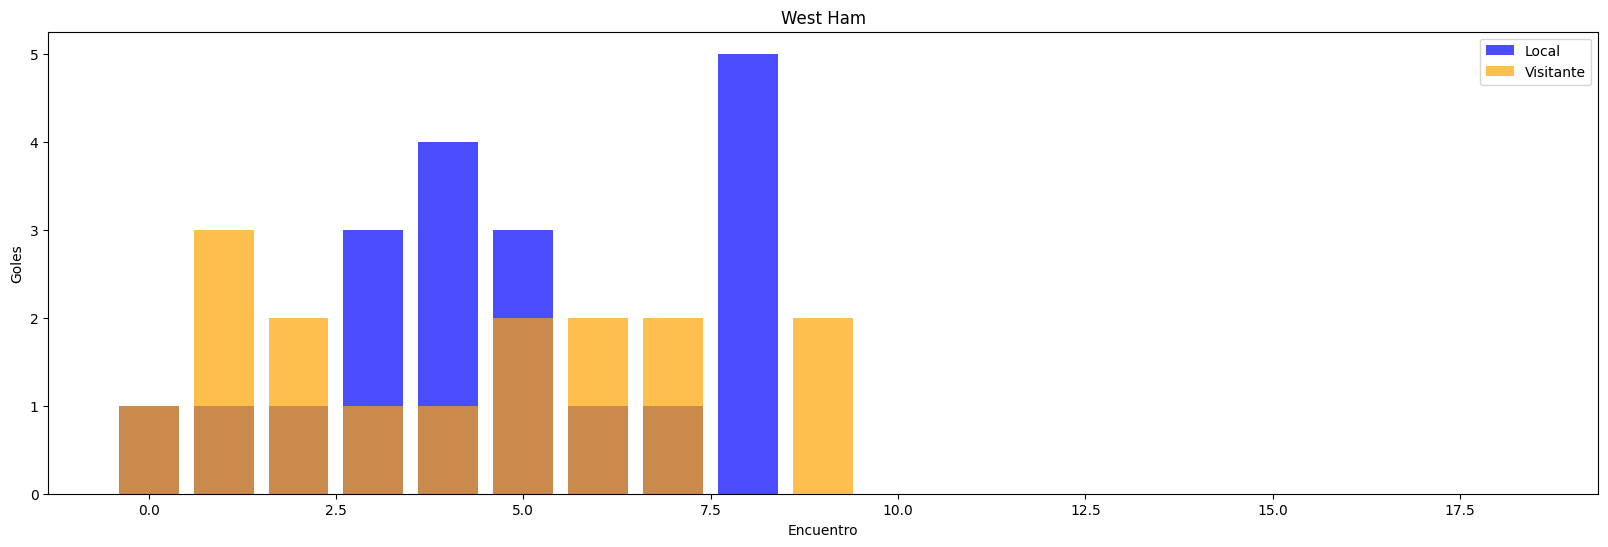

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

class GraficasFutbol:
    def __init__(self, data, equipo, estado):
        self.data = data.copy()
        self.equipo = equipo
        self.estado = estado

    def sub_data_para_graficar(self):
        if self.estado == 'Visitante':
            sub_dataframe_visitante = self.data[self.data['Visitante'] == self.equipo].reset_index()
            return sub_dataframe_visitante
        elif self.estado == 'Local':
            sub_dataframe_local = self.data[self.data['Local'] == self.equipo].reset_index()
            return sub_dataframe_local
        else:
            raise ValueError("El estado debe ser 'Visitante' o 'Local'.")

    def configurar_y_mostrar_grafico(self, ax, xlabel, ylabel, title):
        # Configurar etiquetas y título
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        
        #Mostrar La leyenda
        ax.legend()
        
        # Mostrar el gráfico
        plt.show()

    def grafica_total_goles(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(figsize=(20,6))
            
        data = self.sub_data_para_graficar()

        # Calcular los goles totales por partido
        data['Goles Totales'] = data['Goles Local'] + data['Goles Visitante']

        # Crear un gráfico de barras con los goles totales por encuentro
        ax.bar(data.index, data['Goles Totales'], color='purple', alpha=0.7)

        self.configurar_y_mostrar_grafico(ax, 'Encuentro', 'Goles Totales por Encuentro',
                                          'Goles Totales por Encuentro de la Liga')

    def grafica_local_visita(self, ax=None, figsize=(20, 6)):
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)
        
        data = self.sub_data_para_graficar()
        
        # Barra para los goles del equipo local
        ax.bar(data.index, data['Goles Local'], label='Local', color='blue', alpha=0.7)

        # Barra para los goles del equipo visitante
        ax.bar(data.index, data['Goles Visitante'], label='Visitante', color='orange', alpha=0.7)

        self.configurar_y_mostrar_grafico(ax, 'Encuentro', 'Goles',self.equipo)

# Crear una instancia de la clase y llamar a las funciones
graficas = GraficasFutbol(data2,'West Ham','Visitante')

graficas.grafica_total_goles()
graficas.grafica_local_visita()




In [ ]:
datos

In [12]:
data2 = data2.to_excel('primerleague.xlsx',index=False,encoding='UTF-8')